In [1]:
import numpy as np
from scipy.linalg import inv
import matplotlib.pyplot as plt
import math

In [2]:
# Parameters
p0 = 1
q0 = 0.5
a0 = 0.8
a = 8
sc = 10
be = sc * a0
pow_val = 3
beta = 10
nbas = 3
Q = 1

In [3]:
# xmin and xmax for the grid
def compute_xmin_xmax(a0, pow_val, q0):
    term = np.log(1/10**pow_val * np.sqrt(np.pi / a0))
    x_max = np.sqrt(-term / a0) + q0
    x_min = -np.sqrt(-term / a0) + q0
    return x_min, x_max

xmin, xmax = compute_xmin_xmax(a0, pow_val, q0)
dx = (xmax - xmin) / (nbas - 1)

print(dx)
print(xmin, xmax)

2.7892244801199517
-2.2892244801199517 3.2892244801199517


In [4]:
# Define the initial wavefunction psi
def psi(x, a0, q0, p0):
    return (a0 / np.pi)**0.25 * np.exp(-a0 * (x - q0)**2 / 2 + 1j * p0 * (x - q0))

# Define Gaussian basis function
def gaussian_basis(x, qn, be, p0):
    return (be / np.pi)**0.25 * np.exp(-be * (x - qn)**2 / 2 + 1j * p0 * (x - qn))

def gaussian_overlap(qn1, qn2, p1, p2, be):
    t1 = qn1 - qn2
    t2 = t1 ** 2
    t3 = be ** 2
    t10 = (p1 - p2) ** 2
    t15 = np.exp(1.0 / be * (-t3 * t2 + 1j * 2 * (p1 + p2) * be * t1 - t10) / 4)
    return t15

# Define projection integral between psi and Gaussian basis functions
def projection(q0, qn, p0, pn, a0, be):
    t1 = q0 - qn
    t11 = (-pn + p0) ** 2
    t13 = a0 + be
    t16 = np.exp(1 / t13 * (-2 * a0 * t1 * (be * t1 / 2 + 1j * pn) + (-2j) * be * t1 * p0 - t11) / 2)
    t17 = be ** 0.25
    t19 = a0 ** 0.25
    t24 = np.sqrt(2) * t13 ** (-0.5) * t19 * t17 * t16
    return t24

In [5]:
# lists to store grid points and basis function parameters
qn_list = []
pn_list = []
an_list = []
Qn_list = []
g_list = []

for n in range(nbas):
    qn = xmin + n * dx
    pn = p0 + (n - 1)
    Qn = Q
    an = be
    qn_list.append(qn)
    pn_list.append(pn)
    Qn_list.append(Qn)
    an_list.append(an)
    

# Print results
print("qn_list:", qn_list)
print("pn_list:", pn_list)
print("an_list:", an_list)
print("Qn_list:", Qn_list)


qn_list: [-2.2892244801199517, 0.5, 3.2892244801199517]
pn_list: [0, 1, 2]
an_list: [8.0, 8.0, 8.0]
Qn_list: [1, 1, 1]


In [6]:
# Overlap matrix S
S_analytical = np.zeros((nbas, nbas), dtype=complex)
for i in range(nbas):
    for j in range(nbas):
        S_analytical[i, j] = gaussian_overlap(qn_list[i], qn_list[j], pn_list[i], pn_list[j], be)

# analytical overlap matrix
print("Analytical Overlap Matrix S_analytical:")
print(S_analytical)

# Inverse of the analytical overlap matrix
S_inv_analytical = inv(S_analytical)
print("Inverse of Analytical Overlap Matrix S_inv_analytical:")
print(S_inv_analytical)

# Projection vector p
p_analytical = np.zeros(nbas, dtype=complex)
for i in range(nbas):
    p_analytical[i] = projection(q0, qn_list[i], p0, pn_list[i], a0, be)

print("Projection vector p_analytical:")
print(p_analytical)

Analytical Overlap Matrix S_analytical:
[[ 1.00000000e+00+0.00000000e+00j  2.96975549e-08-1.66812104e-07j
   6.27832137e-28+5.33919385e-28j]
 [ 2.96975549e-08+1.66812104e-07j  1.00000000e+00+0.00000000e+00j
  -8.54433127e-08+1.46313578e-07j]
 [ 6.27832137e-28-5.33919385e-28j -8.54433127e-08-1.46313578e-07j
   1.00000000e+00+0.00000000e+00j]]
Inverse of Analytical Overlap Matrix S_inv_analytical:
[[ 1.00000000e+00+0.00000000e+00j -2.96975549e-08+1.66812104e-07j
   2.18694184e-14+1.85981343e-14j]
 [-2.96975549e-08-1.66812104e-07j  1.00000000e+00-4.77539239e-30j
   8.54433127e-08-1.46313578e-07j]
 [ 2.18694184e-14-1.85981343e-14j  8.54433127e-08+1.46313578e-07j
   1.00000000e+00-5.13459902e-31j]]
Projection vector p_analytical:
[-0.03478374-0.02410109j  0.75826089+0.j         -0.04211113+0.00417427j]


In [7]:
# Complex coefficients c_analytical
c_analytical = S_inv_analytical @ p_analytical
print("Coefficients Vector c_analytical:")
print(c_analytical)

Coefficients Vector c_analytical:
[-0.03478377-2.41009667e-02j  0.75826088+1.30361856e-08j
 -0.04211106+4.17437930e-03j]


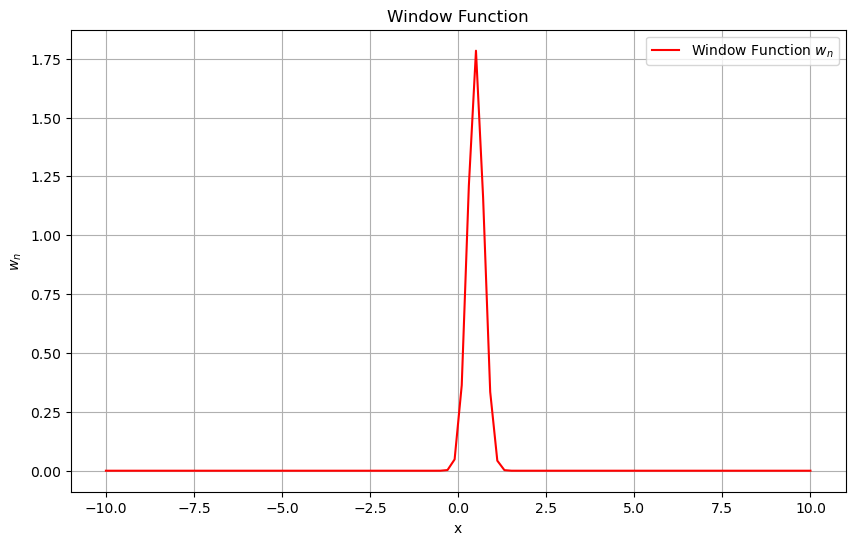

In [8]:
### Semi-Local Fit to the Momentum 
x_vals_plot = np.linspace(-10, 10, 100)
# Window function 
def window_function(x_val, q_n, beta):
    return np.sqrt(beta/np.pi)*np.exp(-beta*(x_val-q_n)**2)

# Window function
w_n = window_function(x_vals_plot, q0, beta)

plt.figure(figsize=(10, 6))
plt.plot(x_vals_plot, w_n, label='Window Function $w_n$', color='red')
plt.title('Window Function')
plt.xlabel('x')
plt.ylabel('$w_n$')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
### Functions to compute the coefficients of the linear Matrix Md=b
def compute_M11(qn1, qn2, p1, p2, be, beta):
    t1 = qn1 - qn2
    t2 = t1 ** 2
    t3 = be ** 2
    t5 = qn1 ** 2
    t6 = qn2 ** 2
    t22 = (p1 - p2) ** 2
    t24 = be + beta
    
    t28 = np.exp(1.0 / t24 * (-t3 * t2 + 2 * be * (beta * (-t5 - t6 + 2 * qn1 + 2 * qn2 - 2) + 1j * t1 * (p1 + p2)) 
                              + 4j * (p1 * qn1 - p2 * qn2 - p1 + p2) * beta - t22) / 4)
    
    t29 = np.sqrt(be)
    t31 = np.sqrt(t24)
    t33 = (1.0 / t31) * t29 * t28
    
    return t33


M11_matrix = np.zeros((nbas, nbas), dtype=complex)

eta = 0.5
beta = be*eta
Q = 1

for i in range(nbas):
    for j in range(nbas):
        qn1 = qn_list[i]
        qn2 = qn_list[j]
        p1 = pn_list[i]
        p2 = pn_list[j]
        Q= 1
        M11_matrix[i, j] = compute_M11(qn1, qn2, p1, p2, be, beta)
        
print(M11_matrix)

[[ 2.41141370e-13+0.00000000e+00j  7.03585621e-12-6.72853795e-12j
   1.82935290e-28+3.10277753e-28j]
 [ 7.03585621e-12+6.72853795e-12j  4.19203322e-01+0.00000000e+00j
  -3.77694328e-09+1.61056357e-08j]
 [ 1.82935290e-28-3.10277753e-28j -3.77694328e-09-1.61056357e-08j
   6.96269428e-07+0.00000000e+00j]]


In [10]:
# Function to compute the value using the M11 matrix and coefficients vector c
def compute_M11_value(c, nbas, M11_matrix):
    M11_value = 0
    for i in range(nbas):
        for j in range(nbas):
            M11_value += np.conj(c_analytical[i]) * M11_matrix[i, j] * c_analytical[j]
    return M11_value

M11_result = compute_M11_value(c_analytical, nbas, M11_matrix)
print("M11:", M11_result)

M11: (0.24102496142660101-9.305781891221561e-25j)


In [11]:
def compute_M12(qn1, qn2, p1, p2, be, beta):
    t5 = qn1 - qn2
    t6 = t5 ** 2
    t7 = be ** 2
    t9 = qn1 ** 2
    t10 = qn2 ** 2
    t26 = (p1 - p2) ** 2
    t28 = be + beta
    
    t32 = np.exp(1.0 / t28 * (-t7 * t6 + 2 * be * (beta * (-t9 - t10 + 2 * qn1 + 2 * qn2 - 2) + 1j * t5 * (p1 + p2)) 
                              + 4j * (p1 * qn1 - p2 * qn2 - p1 + p2) * beta - t26) / 4)
    
    t34 = np.sqrt(be)
    t35 = np.sqrt(t28)
    t41 = (-1.0 / t35 / t28) * t34 * t32 * ((-qn1 - qn2 + 2) * be + 1j * p1 - 1j * p2) / 2
    
    return t41

M12_matrix = np.zeros((nbas, nbas), dtype=complex)

eta = 0.5
beta = be * eta

for i in range(nbas):
    for j in range(nbas):
        qn1 = qn_list[i]
        qn2 = qn_list[j]
        p1 = pn_list[i]
        p2 = pn_list[j]
        Qn1 = Qn_list[i]
        Qn2 = Qn_list[j]
        
    
        M12_matrix[i, j] = compute_M12(qn1, qn2, p1, p2, be, beta)

print("M12_Matrix:")
print(M12_matrix)

M12_Matrix:
[[-5.28778732e-13+0.00000000e+00j -8.60645711e-12+8.79180758e-12j
  -8.68349095e-29-8.81813103e-29j]
 [-8.60645711e-12-8.79180758e-12j -1.39734441e-01+0.00000000e+00j
  -2.92366795e-09+9.44815994e-09j]
 [-8.68349095e-29+8.81813103e-29j -2.92366795e-09-9.44815994e-09j
   1.06261135e-06-0.00000000e+00j]]


In [12]:
def compute_M11_value(c, nbas, M12_matrix):
    M12_value = 0
    for i in range(nbas):
        for j in range(nbas):
            M12_value += np.conj(c_analytical[i]) * M12_matrix[i, j] *c_analytical[j]
    return M12_value

M12_result = compute_M11_value(c_analytical, nbas, M12_matrix)
print("M12:", M12_result)

M12: (-0.08034165131695285+2.5849394142282115e-26j)


In [13]:
def compute_M22(qn1, qn2, p1, p2, be, beta):

    t2 = (qn1 + qn2 - 2) ** 2
    t3 = be ** 2
    t6 = p1 - p2
    t13 = p1 ** 2
    t16 = p2 ** 2
    t19 = qn1 - qn2
    t20 = t19 ** 2
    t22 = qn1 ** 2
    t23 = qn2 ** 2
    t38 = t6 ** 2
    t40 = be + beta
    
    t44 = np.exp(1.0 / t40 * (-t3 * t20 + 2 * be * (beta * (-t22 - t23 + 2 * qn1 + 2 * qn2 - 2) + 1j * t19 * (p1 + p2)) 
                              + 4j * (p1 * qn1 - p2 * qn2 - p1 + p2) * beta - t38) / 4)
    
   
    t46 = np.sqrt(be)
    t47 = t40 ** 2
    t48 = np.sqrt(t40)
    t54 = (-1.0 / t48 / t47) * t46 * t44 * (-t3 * t2 / 2 + be * (-1 + 1j * qn1 * t6 + 1j * qn2 * t6 - 2j * p1 + 2j * p2)  + t13 / 2 - p1 * p2 + t16 / 2 - beta) / 2
    
    return t54

M22_matrix = np.zeros((nbas, nbas), dtype=complex)

eta = 0.5
beta = be * eta

for i in range(nbas):
    for j in range(nbas):
        qn1 = qn_list[i]
        qn2 = qn_list[j]
        p1 = pn_list[i]
        p2 = pn_list[j]
        M22_matrix[i, j] = compute_M22(qn1, qn2, p1, p2, be, beta)
print("M22_Matrix:")
print(M22_matrix)

M22_Matrix:
[[ 1.16956219e-12-0.00000000e+00j  1.07974347e-11-1.17436690e-11j
   4.39157161e-29+3.50857673e-29j]
 [ 1.07974347e-11+1.17436690e-11j  6.40449520e-02-0.00000000e+00j
  -2.29474539e-09+6.18420834e-09j]
 [ 4.39157161e-29-3.50857673e-29j -2.29474539e-09-6.18420834e-09j
   1.65071516e-06-0.00000000e+00j]]


In [14]:
# Function to compute the value using the M11 matrix and coefficients vector c
def compute_M22_value(c, nbas, M12_matrix):
    M12_value = 0
    for i in range(nbas):
        for j in range(nbas):
            M12_value += np.conj(c_analytical[i]) * M22_matrix[i, j] *c_analytical[j]
    return M12_value

M22_result = compute_M22_value(c_analytical, nbas, M12_matrix)
print("M22:", M22_result)


M22: (0.036823260847290276-1.0339757656912846e-25j)


In [15]:
def D_values(qn_list, pn_list, Qn_list, an_list, M11_matrix, M12_matrix, M22_matrix, nbas):
    
    D11_list = np.zeros((nbas, nbas), dtype=complex)
    D22_list = np.zeros((nbas, nbas), dtype=complex)

    for i in range(nbas):
        for j in range(nbas):
            qn = qn_list[j]
            pn = pn_list[j]
            Q = Qn_list[j]
            a = an_list[j]

            D11_list[i, j] = (-a*M12_matrix[i, j] + (a * (qn - Q) + 1j * pn) * M11_matrix[i, j])
            D22_list[i, j] = (-a* M22_matrix[i, j] + (a * (qn - Q) + 1j * pn) * M12_matrix[i, j])

    return D11_list, D22_list

D11, D22 = D_values(qn_list, pn_list, Qn_list, an_list, M11_matrix, M12_matrix, M22_matrix, nbas)

# Print results
print("D11:")
print(D11)
print("D22:")
print(D22)


D11:
[[-2.11511493e-12+0.00000000e+00j  4.74367700e-11-3.63844526e-11j
   3.42436333e-27+6.75368449e-27j]
 [-1.16288427e-10-1.06718913e-10j -5.58937763e-01+4.19203322e-01j
  -7.79920960e-08+2.11816159e-07j]
 [-4.11904260e-27+7.45913497e-27j  5.46027524e-08+1.36230879e-07j
   4.25044539e-06+1.39253886e-06j]]
D22:
[[ 4.55767807e-12+0.00000000e+00j -6.07454566e-11+5.01756643e-11j
  -1.76523991e-27-2.06929047e-27j]
 [ 1.40089078e-10+1.37396478e-10j  4.65781469e-02-1.39734441e-01j
  -5.40818146e-08+1.17710670e-07j]
 [ 1.93363035e-27-2.03969886e-27j  3.95007948e-08+8.43426385e-08j
   6.25472595e-06+2.12522269e-06j]]


In [16]:
def compute_b1_b2(c, g_list, qn_list, pn_list, Qn_list, an_list, M11_matrix, M12_matrix, M22_matrix, nbas):
    D11, D22 = D_values(qn_list, pn_list, Qn_list, an_list, M11_matrix, M12_matrix, M22_matrix, nbas)
    
    b1 = 0
    b2 = 0
    
    for i in range(nbas):
        for j in range(nbas):
            b1 += np.conj(c_analytical[i]) * D11[i, j] * c_analytical[j]
            b2 += np.conj(c_analytical[i]) * D22[i, j] *c_analytical[j]

    return np.array([b1, b2])

b1b2 = compute_b1_b2(c_analytical, g_list, qn_list, pn_list, Qn_list, an_list, M11_matrix, M12_matrix, M22_matrix, nbas)

print("b1:", b1b2[0])
print("b2:", b1b2[1])

b1: (-0.32136660526781136+0.24102495100785373j)
b2: (0.02678056267586063-0.08034165629772587j)


In [17]:
m_matrix = np.array([[M11_result, M12_result], [M12_result, M22_result ]])  
print(m_matrix)

[[ 0.24102496-9.30578189e-25j -0.08034165+2.58493941e-26j]
 [-0.08034165+2.58493941e-26j  0.03682326-1.03397577e-25j]]


In [18]:
b_vector = np.linalg.solve(m_matrix, b1b2)
print(b_vector)

[-3.99999808+9.99999676e-01j -7.99999461-8.41773547e-07j]
